In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df = df.rename(columns={'Gender' : 'gender', 'Age' : 'age',
                        'Annual Income (k$)' : 'annual_income',
                        'Spending Score (1-100)' : 'spending_score' })
df['gender'].replace(['Female','Male'], [0,1], inplace=True)
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [21]:
from sklearn.cluster import KMeans
X = df.drop(['CustomerID', 'gender'], axis=1)
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

C:\Users\bukyt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

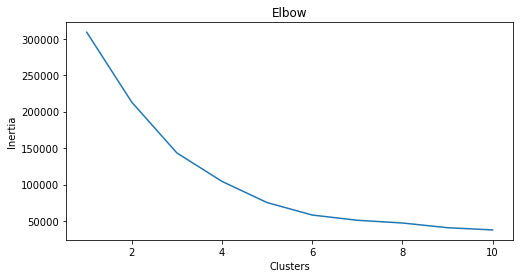

In [25]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

C:\Users\bukyt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

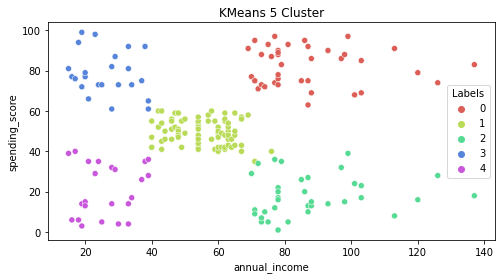

In [28]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans 5 Cluster')
plt.show

In [29]:
print(X)

     age  annual_income  spending_score  Labels
0     19             15              39       4
1     21             15              81       3
2     20             16               6       4
3     23             16              77       3
4     31             17              40       4
..   ...            ...             ...     ...
195   35            120              79       0
196   45            126              28       2
197   32            126              74       0
198   32            137              18       2
199   30            137              83       0

[200 rows x 4 columns]
